### Project Objective:

To build a model that predicts the Concrete Compressive Strength(MPa) for a given set of features and to determine which features influence the concrete compressive strength the most.

The data set used in this notebook is from a Third-party data source. The data set used and information on it can be found here: http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/

Finding out the factors that influence the Concrete Compressive Strength can help the sales representative show the management where the problem being complained about by clients about the inconsistency in Concrete Compressive Strength, CCS lies. Resolving this issue can help improve sales from already existing customers and can even fetch the company more referrals because an improvement in product quality. 

This problem can be solved using Machine Learning because the relationship between the CCS and the available features which did not priorly have any physical or empirical solution can be modelled for the prediction of CCS. This model can then be applied to new data to predict the CCS based on some features. 
Since both the features and the target were given, it is a supervised ML problem, and since it involves predicting a continuous value, it is a regression problem.

In [1]:
# Import basic libraries for data wrangling, analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load data set
concrete_data = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')

In [4]:
# What does this data set look like?
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Some features like `Fly Ash` have a lot of zero values. Since finding out if these are missing values or if the data is accurate from the right authorities is not possible, we'll have to work on it like this. Let's see more samples of the instances to get a better picture of what the values of the data set look like. 

In [ ]:
concrete_data.sample(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
256,212.52,0.00,100.37,159.32,8.71,1007.8,903.59,28,31.640054
884,300.00,0.00,120.00,212.00,10.00,878.0,728.00,28,23.835185
795,525.00,0.00,0.00,189.00,0.00,1125.0,613.00,180,61.921840
11,198.60,132.40,0.00,192.00,0.00,978.4,825.50,28,28.021684
135,439.00,177.00,0.00,186.00,11.10,884.9,707.90,28,65.996643
224,167.95,42.08,163.83,121.75,5.72,1058.7,780.11,3,7.749710
93,374.00,189.20,0.00,170.10,10.10,926.1,756.70,7,46.201787
519,284.00,15.00,141.00,179.00,5.46,842.0,801.00,28,43.733463
405,500.00,0.00,0.00,151.00,9.00,1033.0,655.00,28,69.837024
872,261.00,100.00,78.00,201.00,9.00,864.0,761.00,28,32.398477


In [ ]:
# See information on the data set
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


This data set consists of 8 features and one target column, 9 columns in total. I'll need to explore and visualise to better understand the relationship between the various attributes.

According to the information given on the data set, the features have a non-linear relationship with the target.

All the values in the data set are numerical values, there are 1030 instances with no null values, this is a small data set but is suitable for the purpose here. 

The available features are the major components of a concrete mix and they are what determine the consistency of the outcome, the are expressed as weights in a unit volume of mixture. I believe the features are suitable for the prediction.

I'll be renaming the columns to shorter names to make them easier to code. I'll also be using different types of plots to check for outliers and to understand how the various attributes relate with each other.

In [ ]:
# Get column names
concrete_data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
# Rename the colums
concrete_data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'C. Aggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'F. Aggregate', 'Age (day)':'Age',
       'Concrete compressive strength(MPa, megapascals) ':'CCS'}, inplace=True)

# Check the new column names
concrete_data.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,C. Aggregate,F. Aggregate,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
# Get data correlation
concrete_data.corr()

,Cement,Slag,Fly Ash,Water,Superplasticizer,C. Aggregate,F. Aggregate,Age,CCS
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
C. Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
F. Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
CCS,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


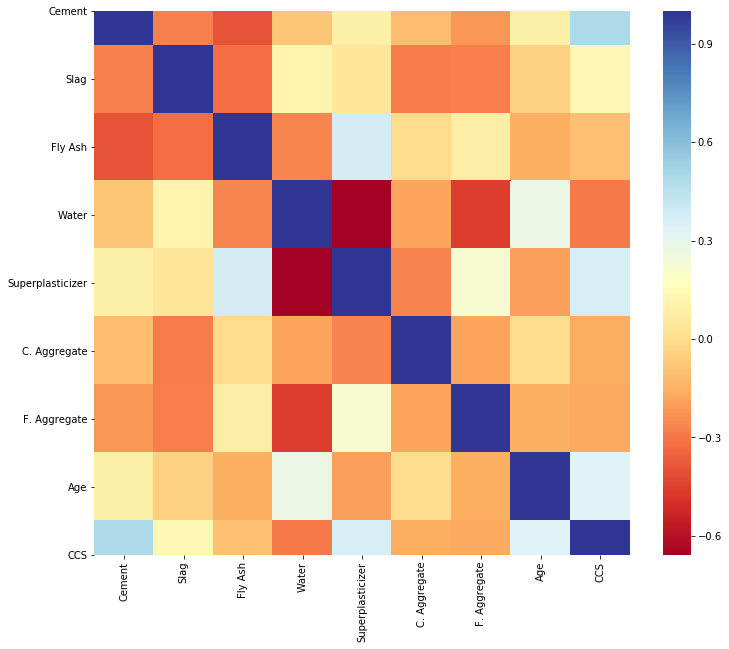

In [ ]:
# Plot correlartion
fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(concrete_data.corr(), cmap='RdYlBu')

plt.show()

`Cement`, `Superplasticizer`, and `Age`, these features are highly positively correlated with `CCS`. `Water` has strong negative correlation with `Superplacticizer`, `Fly Ash` and, `CCS` in that other. Some of the other features appear to have a stronger correlations between themselves, especially with `Cement` and `Slag` than they do with `CCS`. However, I will not penalize any features for multicollinearity since none of them has a high enough correlation with each other. No feature is getting dropped yet.

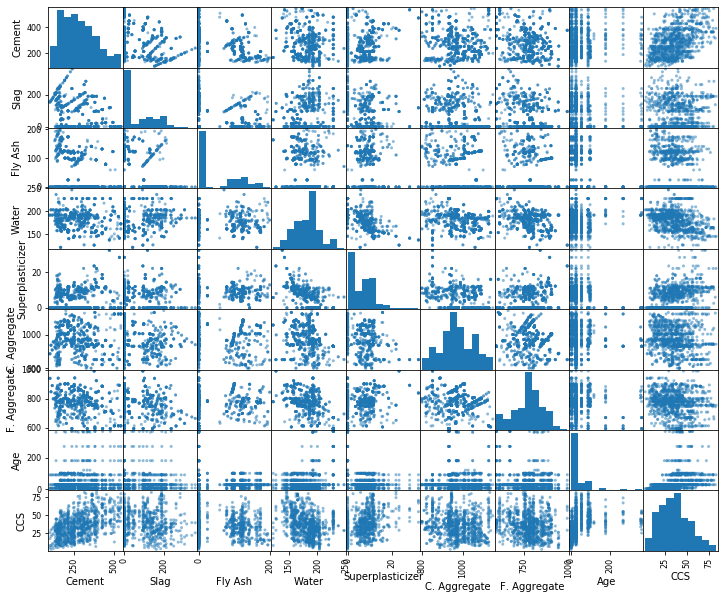

In [ ]:
# Use pandas scatter_matrix to pair-plot all the features
from pandas.plotting import scatter_matrix

scatter_matrix(concrete_data, figsize=(12,10));

plt.show()

Of all the features, `Cement` shows a stronger positive relationship with the `CCS`, which is fitting since `cement` along with `water` are the 2 major components of a concrete mix. The zero values which were earlier observed from checking the data samples in `Fly Ash`, `Slag` and `Superplasticizer` can also be observed in the plot, I'll do a boxplot to see if these values are outliers and further visualize the data to see how they may affect what the model to be built will learn.

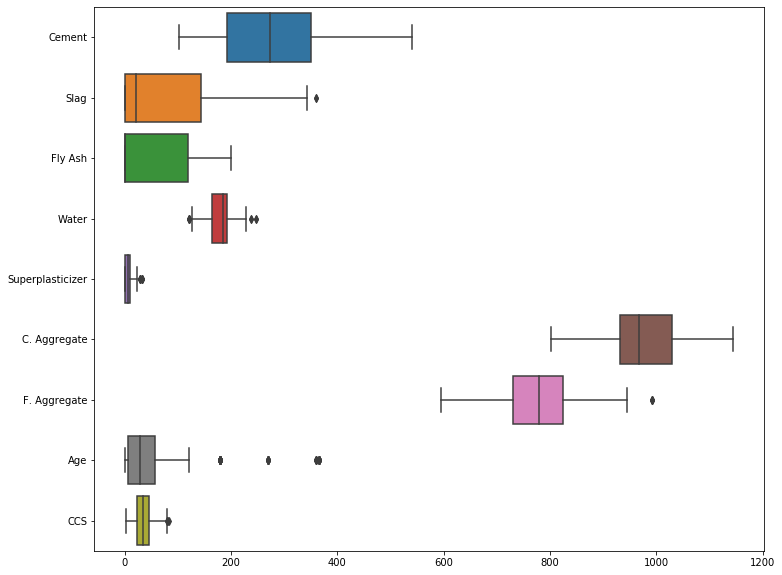

In [ ]:
# Boxplot to check for outliers

fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(data=concrete_data, ax=ax, orient='h')

plt.show()

`Fine Aggregate` and `Coarse Aggregate` have values of higher magnitude compared to the other attributes. `Age` appears to have the most outliers, `CCS`, `Superplasticizer`, and `Water` also have a number of outliers, while `Fine Aggregate` and `Slag` have only one outlier each. Outliers can act as noise when the model tries to learn the relationship between features. They can be handled in a number of ways depending on the nature and significance of the outliers. For this analysis, since the data set is a small one, I have decided not to drop the outliers. Instead, I will create seperate dataframes where the data will be transformed using `log transformation` or `Standard Scaler`(Depending on which one I deem suitable after looking at what the data distribution looks like). This will allow me compare the performance of the models on the data set with and without outliers, this transformation will be done later on in the notebook after splitting the data into training and testing set of course. This is so that our prediction values will not be affected by bias from transform and also appear to be too small (due to the transformation). 

For now, I'll continue my data analysis and exploration by visualizing the distribution of the data set atributes. 

In [ ]:
# Get statistical distribution of the values
concrete_data.describe()

,Cement,Slag,Fly Ash,Water,Superplasticizer,C. Aggregate,F. Aggregate,Age,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


The data values have standard deviation and mean values that are far from normal distribtuion. Also since we will be using all the features to simultaneously predict the CCS, the features may need to be on the same scale. From the range of values of the min, mean and max the values are obviously on different scales (the coarse and fine aggregates values are higher than the other values, although not much) and will need to be scaled before modelling. Let's see what these distributions look like visually before we determine the next line of action.

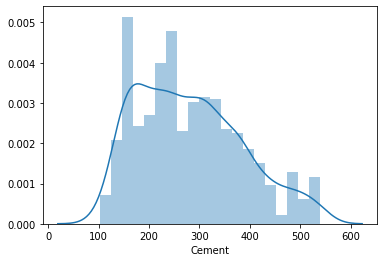

In [ ]:
# Plot density distribution of population to determine possibile need for normalization

sns.distplot(concrete_data['Cement'], bins=20);

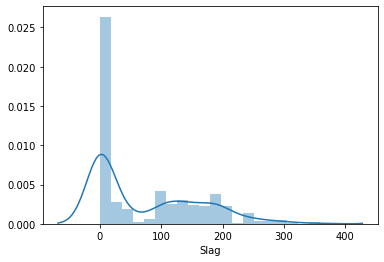

In [ ]:
sns.distplot(concrete_data['Slag'], bins=20);

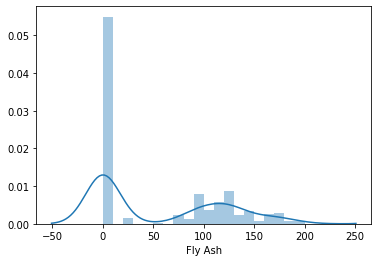

In [ ]:
sns.distplot(concrete_data['Fly Ash'], bins=20);

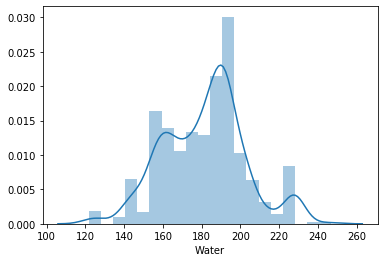

In [ ]:
sns.distplot(concrete_data['Water'], bins=20);

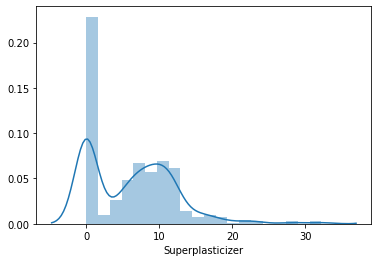

In [ ]:
sns.distplot(concrete_data['Superplasticizer'], bins=20);

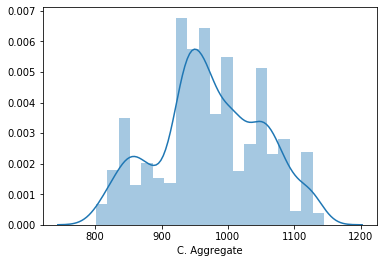

In [ ]:
sns.distplot(concrete_data['C. Aggregate'], bins=20);

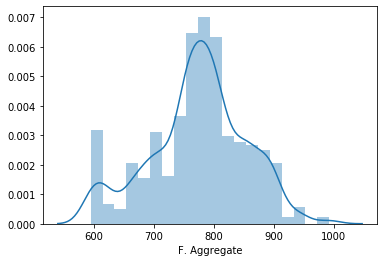

In [ ]:
sns.distplot(concrete_data['F. Aggregate'], bins=20);

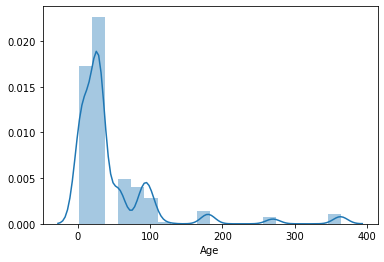

In [ ]:
sns.distplot(concrete_data['Age'], bins=20);

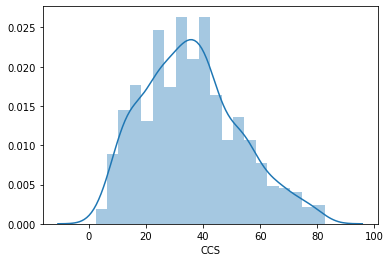

In [ ]:
sns.distplot(concrete_data['CCS'], bins=20);

The features that were observed to have lots of zero values obviously have a distribution that is left-skewed because of too many of these zero values. Apart from this, the data columns except Age have a fairly normal distributions. 

`Log Transformation` is more suited for data sets with lots of values that are left-skewed and have really high values. Although some features of our data set are left-skewed, having really high values is not the case here. However, as was seen from the statistical data description and the box plot earlier, our attributes have means and STDs that are on different scales, there were also cases of outliers. This has led me to the decision of using the `Standard Scaler` method to preprocess my data. 

Using `Standard Scaler`, I can put my features on the same scale for more efficient learning by my algorithms as well as handle the issue with outliers. I'll perform the train-test split before I proceed to scale.  

#### Train-Test Split and Scaling

I have decided to do an 85%-15% splitting. I chose this so that I can have more data for training since my data set is a small one. Having more training data allows for the building of a more robust model. 

In [ ]:
# Import train_test_split from model selection library
from sklearn.model_selection import train_test_split

# put features in the X variable
X = concrete_data.drop(['CCS'], axis=1)

# Set Target as y variable
y = concrete_data['CCS']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

In [ ]:
# Let's see our data shape after splitting
print('X_train Shape: {}'.format(X_train.shape))
print('\n')
print('y_train Shape: {}'.format(y_train.shape))

X_train Shape: (875, 8)


y_train Shape: (875,)


Before we proceed to scale, let us a build a model first. This will allow us to see the effect(either an improvement or not) the scaling will have on our model performance. This kind of experimentation will help to avoid the mistake of diving head straight into model building with the wrong assumptions,

From the information given on the data set and the scatter_matrix plots, our data has a non-linear relationship. This means that to get better predictions, we need to build our models using non-linear algorithms.

However, for the purpose of what I'm about to do, and for the sake of starting simple, I will build a multiple linear regression model first. After determining that scaling my data is a good assumption, I'll proceed to building models using non-linear algorithms like: `Polynomial Regression`, `Decision Tree`, etc

In [ ]:
# Before any model building can commence, an evaluation metric needs to be imported
# For this notebook I'll be using the r2_score metric

from sklearn.metrics import r2_score

In [ ]:
# Import algorithm
from sklearn.linear_model import LinearRegression

# Instantiate algo
lin_model = LinearRegression()

# Fit training data 
lin_model.fit(X_train, y_train)

# Make prediction
y_pred = lin_model.predict(X_test)

# Evaluate model
print('Training score for this model: {}%'.format((lin_model.score(X_train, y_train)*100).round(2)))
print('Test score for this model: {}%'.format((r2_score(y_test, y_pred)*100).round(2)))

Training score for this model: 61.45%
Test score for this model: 61.55%


This training and test scores are actually not bad for a start. Now, let's scale our data and see what difference that makes.

We import algorithm, instantiate, fit and transform the training features, while we only tranform the test features, note that we do not scale the target value. This is to avoid changing the ground truth in the Target data, and the transformation of the test features without fitting is to make it easier for the model to evaluate. This is the norm when it comes to scaling and transforming data for model building.

In [ ]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Instatiate
stan_scaler = StandardScaler()

X_train2 = stan_scaler.fit_transform(X_train.astype('float64'))

X_test2 = stan_scaler.transform(X_test.astype('float64'))

Next, we build a model similar to the one built earlier, but this time with the scaled data.

In [ ]:
# Instantiate algo
lin_model2 = LinearRegression()

# Fit training data 
lin_model2.fit(X_train2, y_train)

# Make prediction
y_pred = lin_model2.predict(X_test2)

# Evaluate model
print('Training score for this model: {}%'.format((lin_model2.score(X_train2, y_train)*100).round(2)))
print('Test score for this model: {}%'.format((r2_score(y_test, y_pred)*100).round(2)))

Training score for this model: 61.45%
Test score for this model: 61.55%


See why it's very important to be able to evaluate how a model performs based on the assumptions made...

Alas, it offered no improvement when compared to the unscaled data.

Now the question is should we continue building our models without any further preprocessing, our should we still give log transformation a try?

Trying won't hurt. We log tranform the features that were left-skewed: Age, Superplasticizer, Fly ash, Slag.

In [ ]:
# Import log transformer
from sklearn.preprocessing import PowerTransformer

# Instantiate object
log_transform = PowerTransformer()

# Fit training features
log_transform.fit(concrete_data[['Slag']])
log_transform.fit(concrete_data[['Fly Ash']])
log_transform.fit(concrete_data[['Superplasticizer']])
log_transform.fit(concrete_data[['Age']])

# Transform the features
concrete_data['log_Slag'] = log_transform.transform(concrete_data[['Slag']])
concrete_data['log_Fly Ash'] = log_transform.transform(concrete_data[['Fly Ash']])
concrete_data['log_Superplasticizer'] = log_transform.transform(concrete_data[['Slag']])
concrete_data['log_Age'] = log_transform.transform(concrete_data[['Age']])

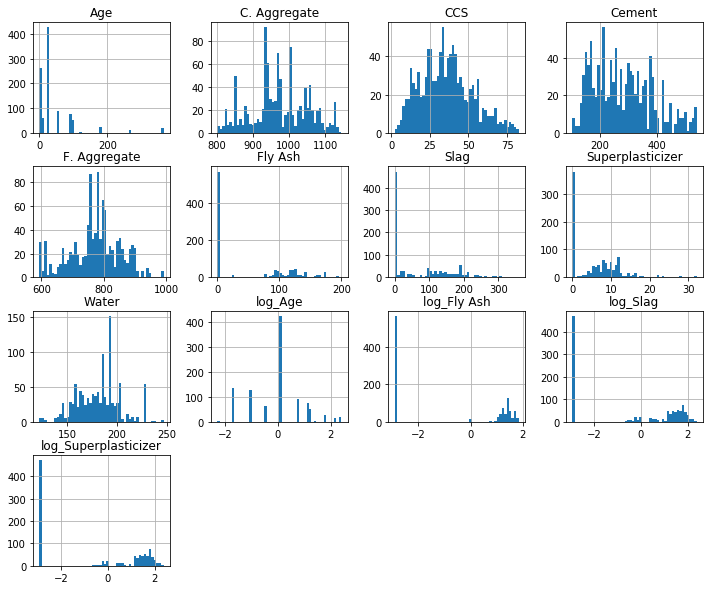

In [ ]:
# Let's visualize the distribution of the data set now 
concrete_data.hist(bins=50, figsize=(12,10));

The distribution of the log_transformed columns are more normally distributed. I'll create a new variable with these new features and see how they perform with the linear model.

In [ ]:
X3= concrete_data[['Cement', 'Water', 'C. Aggregate', 'F. Aggregate', 'log_Slag', 'log_Fly Ash', 'log_Superplasticizer', 'log_Age']]

# Perform train test split
# Split the data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.15, random_state=10)

In [ ]:
# Instantiate algo
lin_model3 = LinearRegression()

# Fit training data 
lin_model3.fit(X_train3, y_train3)

# Make prediction
y_pred = lin_model3.predict(X_test3)

# Evaluate model
print('Training score for this model: {}%'.format((lin_model3.score(X_train3, y_train3)*100).round(2)))
print('Test score for this model: {}%'.format((r2_score(y_test3, y_pred)*100).round(2)))

Training score for this model: 80.13%
Test score for this model: 78.21%


The multiple linear regression model appears to perform better on the log_transformed model than the unscaled model. Although the model appears to overfit for some reason, this could be as a result of the transformation or could be peculiar to this model.

Now that I have my data preprocessed, I'll build functions to automate the building of the models and to compare the results of the models. 

In [ ]:
# A function for model building
def build_model(model, X_train=X_train3, X_test=X_test3, y_train=y_train3, y_test=y_test3):
    """
    This function fits, predicts and evaluates a model. It takes in the following parameters:
    
    model = An instantiated algorithm
    X_train, X_test = train and test features
    y_train, y_test = train and test target
    
    """
    # Fit training data
    model.fit(X_train, y_train)
    
    # Make prediction
    y_pred = model.predict(X_test)
    
    # Evaluate model
    training_score = (model.score(X_train, y_train)*100).round(2)
    test_score = (r2_score(y_test, y_pred)*100).round(2)
    
    print('Training score for this model: {}%'.format(training_score))
    print('Test score for this model: {}%'.format(test_score))
    
    # Create a dataframe of y_test and y_pred
    comparison_df = pd.DataFrame({'y_actual': y_test, 'y_pred': y_pred})
    
    # print samples to see our model prediction
    print('\n', comparison_df.sample(10))
    
    return {'training_score': training_score, 'test_score': test_score}

In [ ]:
# A function for comparing the various model scores 

# Instantiate a dictionary that will contain the various models to be built
model_dic = {}

def result_scores():
    """
    This function consists of a for loop that iterates over the dictionary: model_dic 
    to print out model name and evaluation scores.
    
    """
    for key in model_dic:
        # Print model name
        print('Model:', key )
        
        # Print model training score
        print('Training score is {}%'.format(model_dic[key]['training_score']))
        
        # Print model test score
        print('Test score is {}%'.format(model_dic[key]['test_score']))
        
        print('\n')

Now that we have our functions built, we will begin model building in ernest, starting with the Decision Tree which according to this cheat sheet is suitable for the kind of data set we have. Our data set is medium with few features. However, the Decision tree is not the only algorithim we will be working with.

Other non-linear regression algorithms like polynomial regression and SVR
![choosing%20regression%20algo.PNG](attachment:choosing%20regression%20algo.PNG)

#### Decision Tree

In [ ]:
# import Algorithm
from sklearn.tree import DecisionTreeRegressor

# Instantiate model
dec_tree = DecisionTreeRegressor(random_state=10)

# Build model
model_dic['Decision Tree_Scaled'] = build_model(model=dec_tree)

Training score for this model: 99.45%
Test score for this model: 83.18%

       y_actual     y_pred
739  25.179664  21.649546
626   9.990507  15.069975
456  43.388725  43.499041
572  13.089012  15.691095
675  32.532925  38.074244
719  43.565231  50.732334
536  39.604880  22.489328
485  50.235221  46.684420
11   28.021684  33.399596
16   39.358048  39.662107


This model still overfits and that might be a problem resulting from the log_tranformation as was seen earlier. Let us try to build another decision tree model with the untransformed data and see how it performs.

In [ ]:
# Build model
model_dic['Decision Tree_UnScaled'] = build_model(model=dec_tree, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Training score for this model: 99.7%
Test score for this model: 84.22%

       y_actual     y_pred
349  17.367900  17.574743
781  14.203206  18.912327
384  41.368560  41.368560
381  81.751169  40.934190
647  43.377004  44.207822
304  23.138815  22.504497
177  79.296635  79.296635
750  44.091990  43.942374
686  14.143911   9.561653
1    61.887366  67.306647


Still the same problem of overfitting, from the sample df some values are accurately predicted while others are far from the actual value.

Let us trying setting some hyperparameters like max_depth and see the performance.

In [ ]:
# Instantiate model one hyperparameter specified
dec_tree_hp = DecisionTreeRegressor(max_depth=3, random_state=10)

# Build model 
model_dic['Decision Tree (hp specified)'] = build_model(model=dec_tree_hp)

Training score for this model: 62.08%
Test score for this model: 62.3%

       y_actual     y_pred
211  24.483293  40.219371
353  59.301831  40.219371
307  51.035014  40.219371
225  17.822955  27.864219
658  25.893961  15.637214
381  81.751169  40.219371
375  25.620928  41.065129
740  30.957472  15.637214
27   52.124386  40.219371
153  80.199848  40.219371


In [ ]:
result_scores()

Model: Decision Tree_Scaled
Training score is 99.45%
Test score is 83.18%


Model: Decision Tree_UnScaled
Training score is 99.7%
Test score is 84.22%


Model: Decision Tree (hp specified)
Training score is 62.08%
Test score is 62.3%




Setting the max_depth to 3 helped combat the over fitting but also decreased our model performance a lot. I'll do some hyperparameter tuning on the models with the top 2 performance scores after I've explored other models.

#### Polynomial Regression

Since we are working with features that have a non-linear relationship with the target variable, experimenting with a polynomial regression algorithm seems fitting. Although the drawback of this algorithm is that it is not easily interpretable. I'll start with the quadratic polynomial since it is easier to interprete and see how it performs.

In [ ]:
    # Create polynomial features (for scaled data)
# Import preprocessing object
from sklearn.preprocessing import PolynomialFeatures

# Instantiate the object, specify quadratic degree
poly_features = PolynomialFeatures(degree=2)

# Convert scaled training features to quadratic polynomial features
quad_X_train3 = poly_features.fit_transform(X_train3)

# Transform polynomial test features
quad_X_test3 = poly_features.transform(X_test3)

In [ ]:
# Instantiate model
quad_poly_reg = LinearRegression()

# Build and evaluate
model_dic['Quadratic Polynomial Model_Scaled'] = build_model(model=quad_poly_reg, X_train=quad_X_train3, X_test=quad_X_test3, y_test=y_test3, y_train=y_train3)

Training score for this model: 87.55%
Test score for this model: 85.93%

       y_actual     y_pred
240  22.318338  22.953266
705   3.319827   1.348067
372  37.266178  44.148195
248  44.298833  37.317974
806  24.000660  27.496437
298  48.153004  49.848941
580  21.859147  32.111559
429  29.592310  30.057299
384  41.368560  59.052852
64   48.695621  43.518591


Scaled data overfits, although from the df samples, this model appears to be performing better than prior models. we'll explore it on the unscaled data and then try the SVR as my last algorithm. The `result_scores()` function will allow us see a summary of how our models are performing.

In [ ]:
    # Create polynomial features (UnScaled data)
    
# Convert training features to quadratic polynomial features
quad_X_train = poly_features.fit_transform(X_train)

# Transform polynomial test features
quad_X_test = poly_features.transform(X_test)

In [ ]:
# Instantiate model
quad_poly_reg = LinearRegression()

# Build and evaluate
model_dic['Quadratic Polynomial Model_UnScaled'] = build_model(model=quad_poly_reg, X_train=quad_X_train, X_test=quad_X_test, y_train=y_train, y_test=y_test)

Training score for this model: 80.9%
Test score for this model: 80.81%

       y_actual     y_pred
195  24.986610  17.706215
705   3.319827  10.178208
675  32.532925  33.545915
261  37.404073  26.399799
921   9.735401  15.999528
661  10.393851  14.324845
568  25.447870  30.149254
11   28.021684  22.505303
139  63.397318  64.854369
456  43.388725  30.016966


In [ ]:
result_scores()

Model: Decision Tree_Scaled
Training score is 99.45%
Test score is 83.18%


Model: Decision Tree_UnScaled
Training score is 99.7%
Test score is 84.22%


Model: Decision Tree (hp specified)
Training score is 62.08%
Test score is 62.3%


Model: Quadratic Polynomial Model_Scaled
Training score is 87.55%
Test score is 85.93%


Model: Quadratic Polynomial Model_UnScaled
Training score is 80.9%
Test score is 80.81%




Unlike the scaled data, the unscaled data is not overfitting the polynomial regression model. The problem we will be facing with this type of algorithm would be interpretation. The next model to be built is the SVR algorithm.

#### SVR Algorithm

In [ ]:
# import SVR
from sklearn.svm import SVR

# Instantiate object, specifying some hyperparameters
svr_model = SVR(C=100, epsilon=0.1, max_iter=10000)

# Build model
model_dic['SVR_UnScaled'] = build_model(model=svr_model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training score for this model: 99.35%
Test score for this model: 32.79%

       y_actual     y_pred
567  11.957582  35.743632
142  64.900376  35.743632
429  29.592310  35.743625
143  60.198150  35.743632
846  65.907011  64.521850
837  39.051921  38.791607
901  29.868100  30.520347
686  14.143911  35.743632
899  13.196571  15.310517
585  33.043137  35.743632


In [ ]:
# # Instantiate object, specifying some hyperparameters
svr_model = SVR(C=300, epsilon=0.1, max_iter=10000)

# Build model
model_dic['SVR_Scaled'] = build_model(model=svr_model)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training score for this model: 99.0%
Test score for this model: 79.35%

        y_actual     y_pred
703   30.439676  32.278962
372   37.266178  39.304245
264   19.519066  21.039917
1019  35.225329  35.022790
88    35.301171  35.397151
284   13.624046  19.486190
976   35.865852  35.699683
218   40.389504  34.975630
695   22.347986  21.539116
45    35.076402  31.153864


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Since the warning advices us to try standardizing our data, I will try to build another SVR model with my already standardized data.

In [ ]:
# # Instantiate object, specifying some hyperparameters
svr_model = SVR(C=100, epsilon=5, max_iter=10000)

# Build model
model_dic['SVR_Standardized'] = build_model(model=svr_model, X_test=X_test2, X_train=X_train2, y_train=y_train, y_test=y_test)

Training score for this model: 91.79%
Test score for this model: 88.16%

        y_actual     y_pred
786   31.447000  26.399505
568   25.447870  27.480135
240   22.318338  19.388996
381   81.751169  60.053072
467   41.161717  38.490353
109   55.895819  43.856423
456   43.388725  35.878398
294    7.398077  16.403898
513   40.285098  45.123913
1002  57.218234  49.839965


The SVR model performs better with standard-scaled data, although it still presents the problem of overfitting. Let's check to see the performance of all the different algorithms we've experimented so far.

In [ ]:
result_scores()

Model: Decision Tree_Scaled
Training score is 99.45%
Test score is 83.18%


Model: Decision Tree_UnScaled
Training score is 99.7%
Test score is 84.22%


Model: Decision Tree (hp specified)
Training score is 62.08%
Test score is 62.3%


Model: Quadratic Polynomial Model_Scaled
Training score is 87.55%
Test score is 85.93%


Model: Quadratic Polynomial Model_UnScaled
Training score is 80.9%
Test score is 80.81%


Model: SVR_UnScaled
Training score is 99.35%
Test score is 32.79%


Model: SVR_Scaled
Training score is 99.0%
Test score is 79.35%


Model: SVR_Standardized
Training score is 91.79%
Test score is 88.16%




From the summary above, `Quadratic Polynomial Model_UnScaled`, `SVR_Standardized` and `Decision Tree (hp specified)` are the models I choose as the top 3 performers. I'll tune some of their hyperparameters to get the best performance I can, and then decide which model serves the best purpose of prediction and interpretting feature importance in prediction.

#### HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def hp_tuning(model, parameters):
    """
    This function uses the GridSearchCV to tune the hyperparameters of models. It takes in the following parameters:
    
    model = model to be tuned
    parameters = dictionary of hyperparametrs to be tuned
    
    """
    # Instantiate estimator
    gs_cv_model = GridSearchCV(estimator=model, param_grid=parameters, cv=10, n_jobs=-1)
    
    # Fit to training data
    gs_cv_model.fit(X_train, y_train)
    
    # Print best parameter combination
    print(gs_cv_model.best_params_)

In [ ]:
hp_tuning(model=dec_tree_hp, parameters={'max_depth':[3, 5, 7, 9], 'min_samples_split':[2, 3, 4], 'min_samples_leaf':[0.1, 0.5, 1], 'max_leaf_nodes':[2, 3, 5, 7]})

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 5, 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Instantiate model with hyperparameter specified
dec_tree_hp = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=7, min_samples_leaf=1, min_samples_split=2, random_state=10)

# Build model 
model_dic['Decision Tree (hp Tuned)'] = build_model(model=dec_tree_hp)

Training score for this model: 62.84%
Test score for this model: 63.59%

        y_actual     y_pred
1025  44.284354  36.255634
775   22.435549  36.255634
837   39.051921  46.050415
750   44.091990  46.050415
991   38.215586  47.539498
978   28.991087  25.685867
225   17.822955  18.645954
467   41.161717  36.255634
768   38.996763  36.255634
584   21.917063  18.645954


In [ ]:
hp_tuning(model=svr_model, parameters={'C': [10,50,100,200,500], 'epsilon': [0.01, 0.1, 1, 10, 20]})

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'C': 50, 'epsilon': 0.01}


In [ ]:
# # Instantiate the algo with tuned hp
svr_model = SVR(C=50, epsilon=0.01, max_iter=10000)

# Build model
model_dic['SVR_Standardized'] = build_model(model=svr_model, X_test=X_test2, X_train=X_train2, y_train=y_train, y_test=y_test)

Training score for this model: 91.38%
Test score for this model: 88.25%

       y_actual     y_pred
155  77.297154  74.599967
375  25.620928  23.963494
546  31.966865  27.128178
976  35.865852  37.718713
177  79.296635  79.306751
45   35.076402  35.018905
381  81.751169  58.433208
120  56.695611  52.249229
142  64.900376  71.005179
978  28.991087  28.974495


Of the two model optimized above, the SVR model has a higher performance score but also overfits. Since the performance bench mark for the project I'm working on is set at 30%, I'll go with the `Decision Tree Regressor model` which has a traing score of 62.84% and a test score of 63.59%. 

Using the feature importance attribute, I will show you the level of importance of the various features in predicting the concrete compressive strength.


This next step is in my opinion one of the most important steps, here I'll present my problem solution (which was to predict CCS and show the feature importance levels, I have already been a ble to build a model for the prediction).

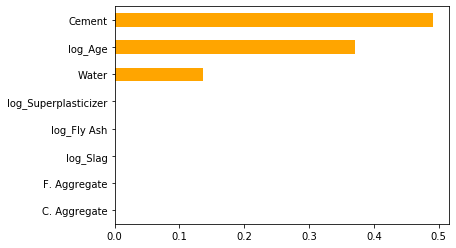

In [ ]:
# Get feature importance 
dec_tree_hp.feature_importances_

# Create a pd Series of feature importances
feature_importances = pd.Series(data=dec_tree_hp.feature_importances_, index=X_train3.columns)

# Sort importances in decending order
feature_importance = feature_importances.sort_values()

# Plot a horizontal bar chart of feature importances
feature_importance.plot(kind='barh', color='Orange')

plt.show()

This easy to interpret bar chart tells us that `Cement`, `Age` and, `Water` are the only features that play a role in determining the Concrete compressive strength, the remaining features have 0 importance according to the chart.